In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
tr_data=pd.read_csv('train.csv')

In [3]:
tr_data

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


**EXPLORATORY DATA  ANALYSIS**

In [4]:
tr_data.shape

(614, 13)

In [5]:
tr_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [6]:
tr_data.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [7]:
tr_data.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


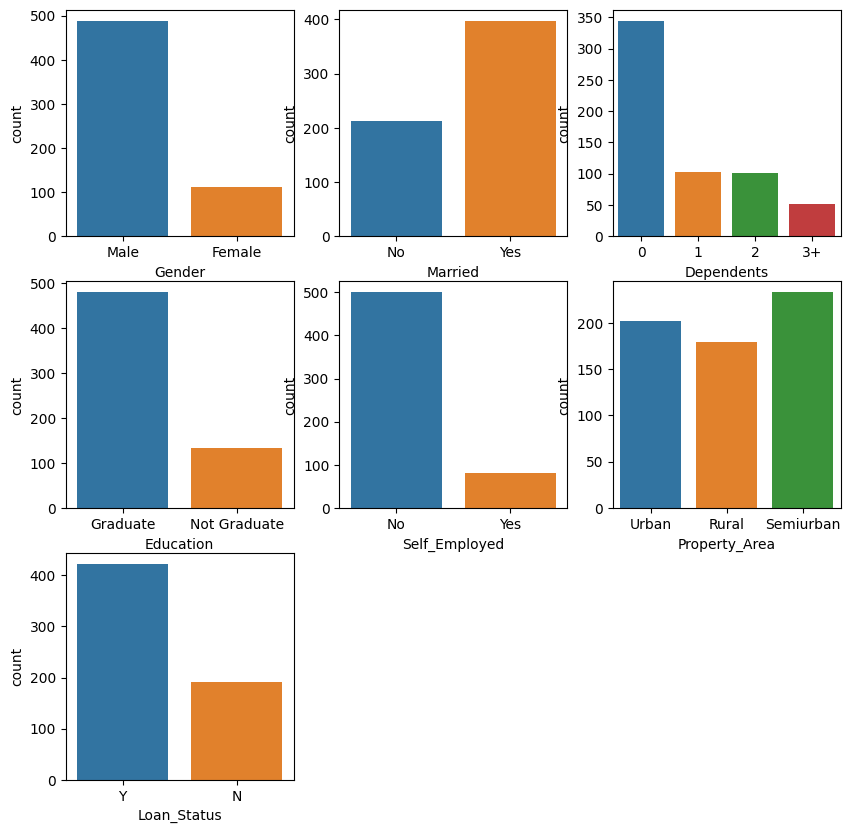

In [8]:
categorical_columns = ['Gender', 'Married','Dependents','Education','Self_Employed','Property_Area','Loan_Status']
plt.figure(figsize=(10,10))
for i in enumerate(categorical_columns):
    plt.subplot(3,3,i[0]+1)
    sns.countplot(data=tr_data,x=i[1])

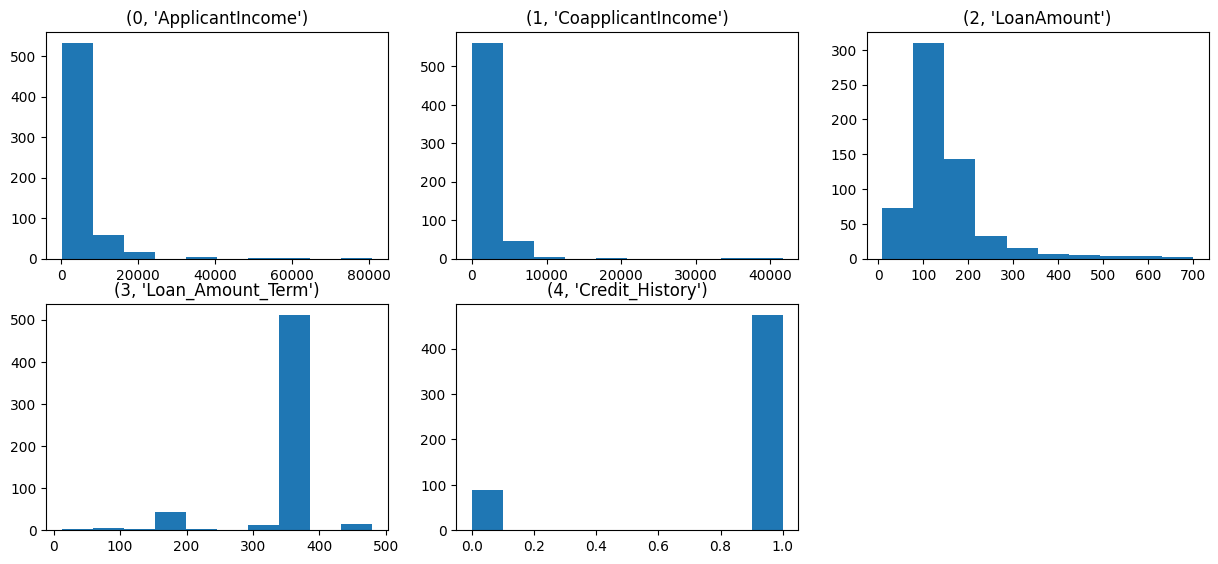

In [9]:
num_cols=['ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term','Credit_History']
plt.figure(figsize=(15,10))
for i in enumerate(num_cols):
    plt.subplot(3,3,i[0]+1)
    plt.title(i)
    plt.hist(tr_data[i[1]])

In [10]:
tr_data['Loan_Status'].value_counts()

Y    422
N    192
Name: Loan_Status, dtype: int64

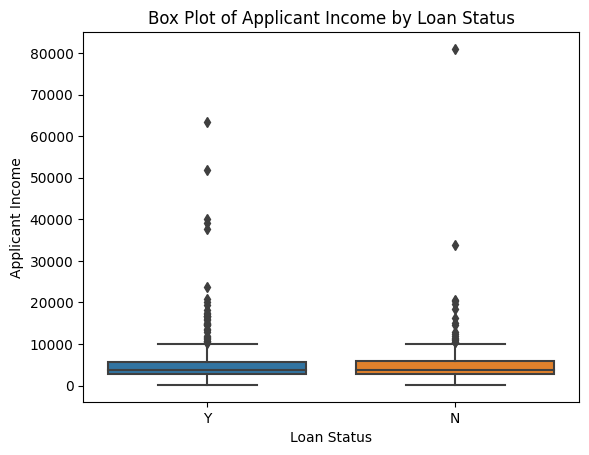

In [11]:
sns.boxplot( x='Loan_Status',y='ApplicantIncome', data=tr_data)
plt.xlabel('Loan Status')
plt.ylabel('Applicant Income')
plt.title('Box Plot of Applicant Income by Loan Status')
plt.show()

**PREPROCESSING**

In [12]:
tr_data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [13]:
tr_data.loc[tr_data['Dependents'] == '3+', 'Dependents'] = 3


In [14]:
tr_data=tr_data.drop('Loan_ID',axis=1)

In [15]:
tr_data.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [16]:
tr_data.shape

(614, 12)

In [17]:
tr_data.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


**HANDLING MISSING VALUES**

In [18]:
tr_data.isna().sum()

Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [19]:
tr_data.dtypes

Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

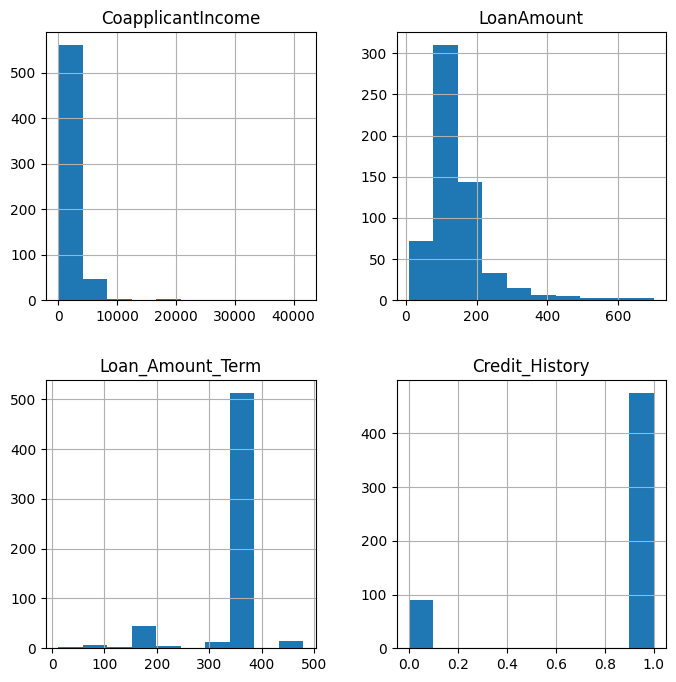

In [20]:
freqgraph=tr_data.select_dtypes(include=['float'])
freqgraph.hist(figsize=(8,8))
plt.show()

In [21]:
float_col=['LoanAmount','Loan_Amount_Term','Credit_History']
for i in float_col:
    tr_data[i]=tr_data[i].fillna(tr_data[i].median())

In [22]:
obj_col=['Gender','Married','Dependents','Self_Employed']
for j in obj_col:
    tr_data[j]=tr_data[j].fillna(tr_data[j].mode()[0])

In [23]:
tr_data.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,128.0,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [24]:
tr_data.isna().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

**ENCODING**

In [25]:
##LABEL ENCODING

In [26]:
tr_data.dtypes

Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [27]:
from sklearn.preprocessing import LabelEncoder
lab_enc=LabelEncoder()

In [28]:
lst=['Gender','Married','Education','Self_Employed','Property_Area','Loan_Status']
for i in lst:
    tr_data[i]=lab_enc.fit_transform(tr_data[i])

In [29]:
tr_data.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0,0,0,5849,0.0,128.0,360.0,1.0,2,1
1,1,1,1,0,0,4583,1508.0,128.0,360.0,1.0,0,0
2,1,1,0,0,1,3000,0.0,66.0,360.0,1.0,2,1
3,1,1,0,1,0,2583,2358.0,120.0,360.0,1.0,2,1
4,1,0,0,0,0,6000,0.0,141.0,360.0,1.0,2,1


**HEATMAP**

<ipython-input-30-61dc3d0516ba>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(tr_data.corr(),annot=True)


<Axes: >

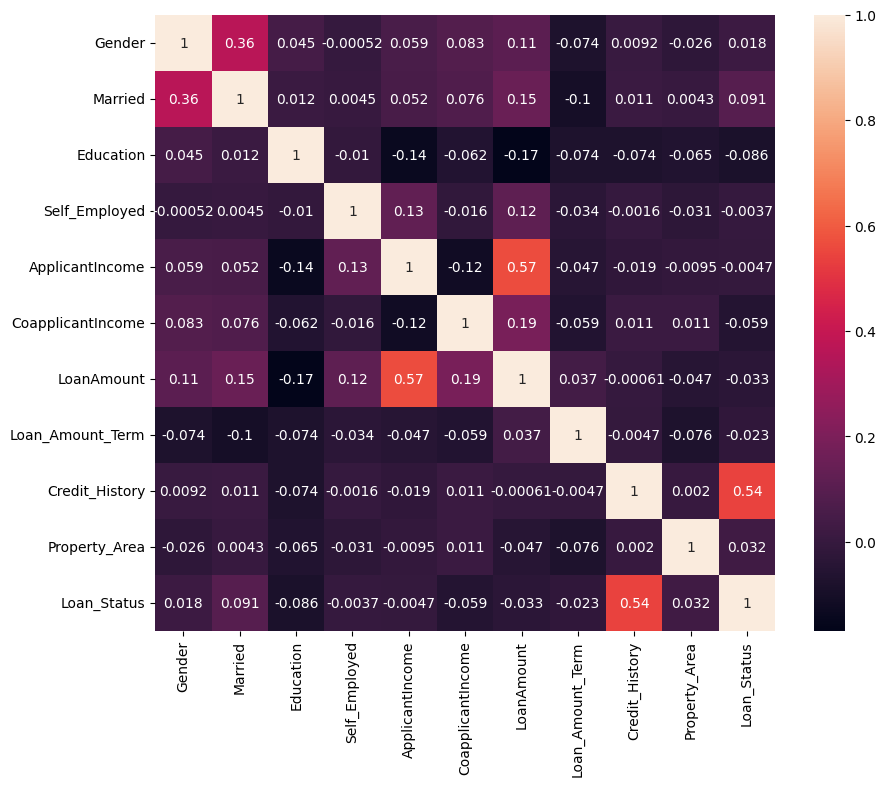

In [30]:
plt.figure(figsize=(10,8))
sns.heatmap(tr_data.corr(),annot=True)

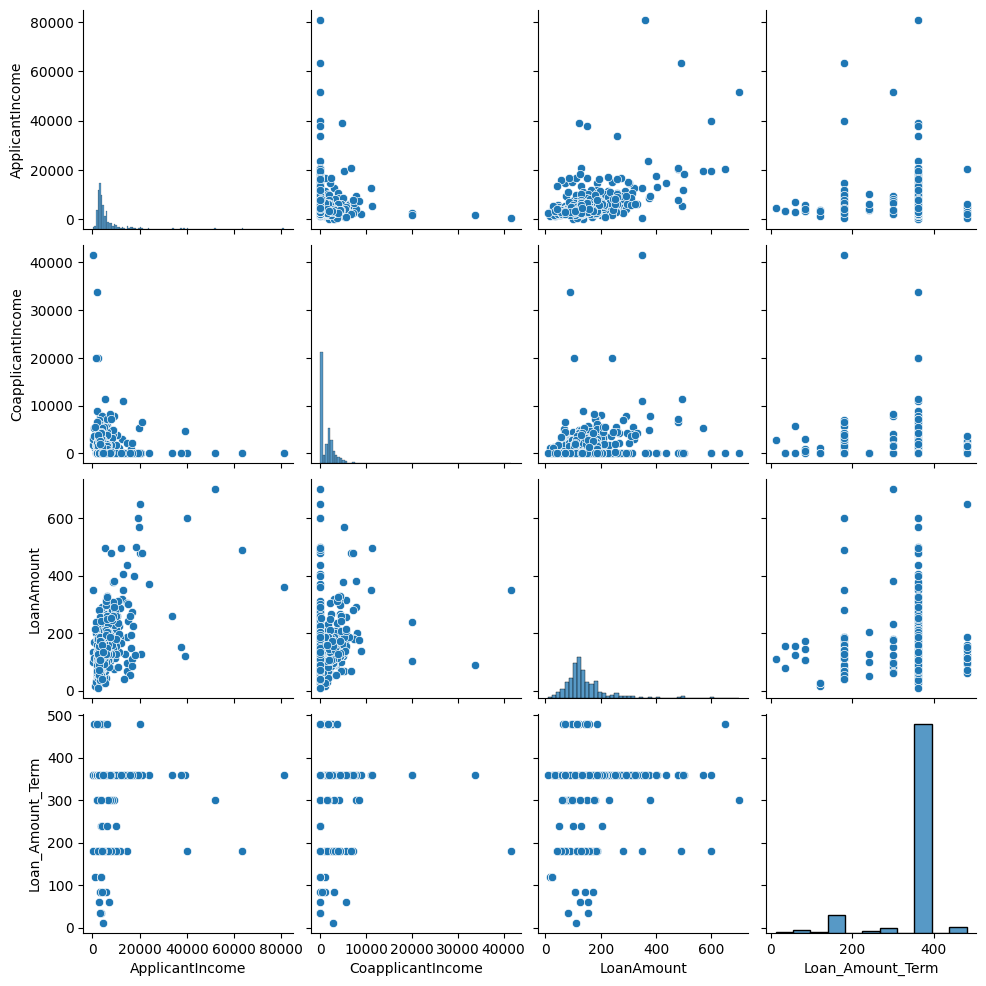

In [31]:
slice_data=tr_data[['ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term']]
sns.pairplot(slice_data)

<Axes: xlabel='Loan_Status', ylabel='ApplicantIncome'>

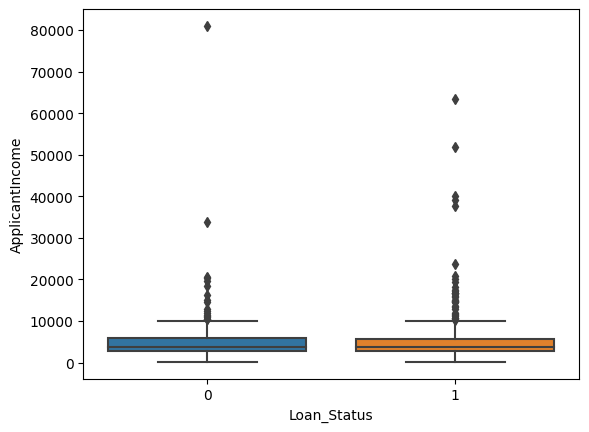

In [32]:
sns.boxplot(x='Loan_Status',y='ApplicantIncome',data=tr_data)

In [33]:
## SPLITTING DATA INTO DEPENDENT AND INDEPENDENT COLUMNS


In [34]:
x=tr_data.drop('Loan_Status',axis=1)
y=tr_data['Loan_Status']

In [35]:
x

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,1,0,0,0,0,5849,0.0,128.0,360.0,1.0,2
1,1,1,1,0,0,4583,1508.0,128.0,360.0,1.0,0
2,1,1,0,0,1,3000,0.0,66.0,360.0,1.0,2
3,1,1,0,1,0,2583,2358.0,120.0,360.0,1.0,2
4,1,0,0,0,0,6000,0.0,141.0,360.0,1.0,2
...,...,...,...,...,...,...,...,...,...,...,...
609,0,0,0,0,0,2900,0.0,71.0,360.0,1.0,0
610,1,1,3,0,0,4106,0.0,40.0,180.0,1.0,0
611,1,1,1,0,0,8072,240.0,253.0,360.0,1.0,2
612,1,1,2,0,0,7583,0.0,187.0,360.0,1.0,2


In [36]:
y

0      1
1      0
2      1
3      1
4      1
      ..
609    1
610    1
611    1
612    1
613    0
Name: Loan_Status, Length: 614, dtype: int64

## Scaling

In [37]:
## Standard Scaling

In [38]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()

In [39]:
tr_data[['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount']] = sc.fit_transform(tr_data[['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount']])


In [40]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=42,test_size=0.2)

 ## LOGISTIC REGRESSION

In [41]:
from sklearn.linear_model import LogisticRegression
logit_model=LogisticRegression()
logit_model.fit(x_train,y_train)
y_pred=logit_model.predict(x_test)

In [42]:
y_pred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [43]:
from sklearn.metrics import confusion_matrix,accuracy_score
cm=confusion_matrix(y_test,y_pred)
print('Confusion matrix of logistic regression is',cm)
print('Accuracy of Logistic Regression is ',accuracy_score(y_test,y_pred))

Confusion matrix of logistic regression is [[18 25]
 [ 1 79]]
Accuracy of Logistic Regression is  0.7886178861788617


<function matplotlib.pyplot.show(close=None, block=None)>

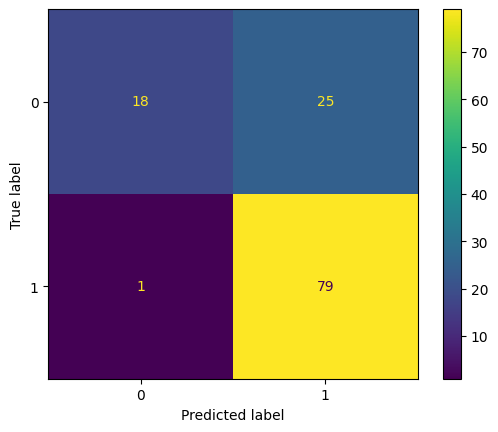

In [44]:
from sklearn.metrics import ConfusionMatrixDisplay
disp=ConfusionMatrixDisplay(cm)
disp.plot()
plt.show

## k -NN CLASSIFICATION

In [45]:
from sklearn.neighbors import KNeighborsClassifier

In [46]:
metric_k=[]
neighbors=np.arange(3,10)

In [47]:
for k in neighbors:
    classifier = KNeighborsClassifier(n_neighbors=k,metric='minkowski',p=2)
    classifier.fit(x_train,y_train)
    y_pred=classifier.predict(x_test)
    acc=accuracy_score(y_test,y_pred)
    metric_k.append(acc)

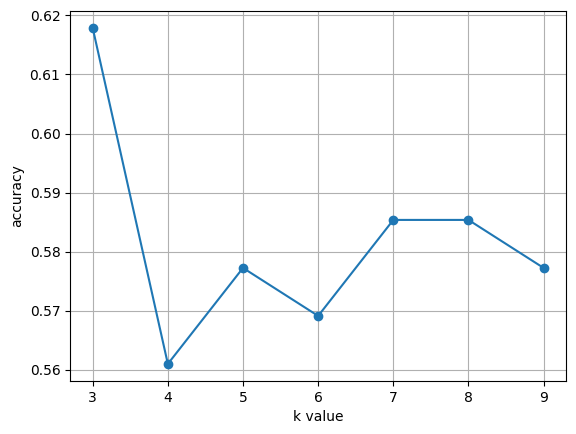

In [48]:
plt.plot(neighbors,metric_k,'o-') 
plt.xlabel('k value')
plt.ylabel('accuracy')
plt.grid()

In [49]:
for k in neighbors:
    classifier = KNeighborsClassifier(n_neighbors=3,metric='minkowski',p=2)
    classifier.fit(x_train,y_train)
    y_pred=classifier.predict(x_test)
    acc=accuracy_score(y_test,y_pred)
    metric_k.append(acc)

In [50]:
y_pred

array([1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1])

In [51]:
from sklearn.metrics import confusion_matrix,accuracy_score,precision_score

In [52]:
c_matrix=confusion_matrix(y_test,y_pred)
print('Confusion matrix of kNN classification  is',c_matrix)

Confusion matrix of kNN classification  is [[ 9 34]
 [13 67]]


In [53]:
print('Accuracy of kNN classification is',accuracy_score(y_test,y_pred))
print('Precision of kNN classification is',precision_score(y_test,y_pred,average='macro'))

Accuracy of kNN classification is 0.6178861788617886
Precision of kNN classification is 0.5362286228622862


<function matplotlib.pyplot.show(close=None, block=None)>

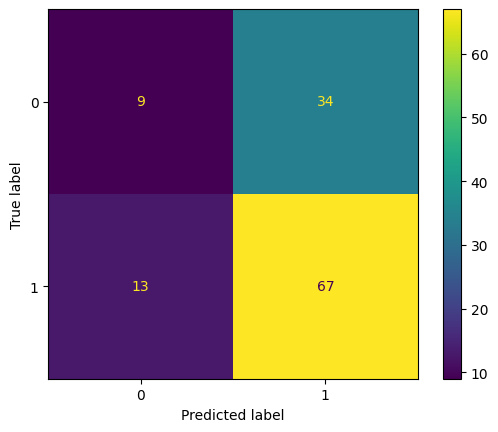

In [54]:
from sklearn.metrics import ConfusionMatrixDisplay
disp=ConfusionMatrixDisplay(c_matrix)
disp.plot()
plt.show

## SVM (Support vector machine )

In [55]:
from sklearn.svm import SVC
svmclf= SVC(kernel='linear')
svmclf.fit(x_train,y_train)
y_pred=svmclf.predict(x_test)

In [56]:
y_pred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [57]:
from sklearn.metrics import accuracy_score,confusion_matrix
print('accuracy of SVM classification model is :',accuracy_score(y_test,y_pred))

accuracy of SVM classification model is : 0.7967479674796748


## DECISION TREE CLASSIFIER

In [58]:
from sklearn.tree import DecisionTreeClassifier
dt_clf=DecisionTreeClassifier(random_state=42)
dt_clf.fit(x_train,y_train)
y_pred=dt_clf.predict(x_test)

In [59]:
y_pred

array([1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1,
       0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0,
       1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1,
       0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0])

In [60]:
print('Accuracy of Decision tree classifier is :',accuracy_score(y_test,y_pred))

Accuracy of Decision tree classifier is : 0.6910569105691057


In [61]:
print(confusion_matrix(y_test,y_pred))

[[23 20]
 [18 62]]


<function matplotlib.pyplot.show(close=None, block=None)>

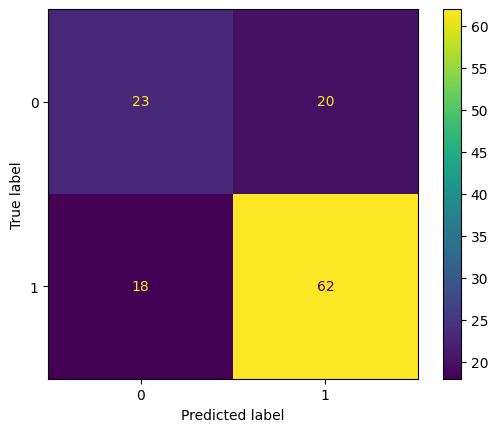

In [62]:
from sklearn.metrics import ConfusionMatrixDisplay
disp=ConfusionMatrixDisplay(confusion_matrix(y_test,y_pred))
disp.plot()
plt.show

## RANDOM FOREST

In [63]:
from sklearn.ensemble import RandomForestClassifier
rf_clf=RandomForestClassifier(random_state=42)
rf_clf.fit(x_train,y_train)

RandomForestClassifier(random_state=42)

In [64]:
y_pred=rf_clf.predict(x_test)

In [65]:
print(accuracy_score(y_test,y_pred))

0.7560975609756098


In [66]:
print(confusion_matrix(y_test,y_pred))

[[18 25]
 [ 5 75]]


In [67]:
##hyper parameter tuning
rf_clf=RandomForestClassifier(n_estimators=20,max_depth=3,criterion='entropy',min_samples_split=2)
rf_clf.fit(x_train,y_train)

RandomForestClassifier(criterion='entropy', max_depth=3, n_estimators=20)

In [68]:
y_pred=rf_clf.predict(x_test)
print('Accuracy is :',accuracy_score(y_test,y_pred))

Accuracy is : 0.7804878048780488


In [69]:
print(confusion_matrix(y_test,y_pred))

[[18 25]
 [ 2 78]]


<function matplotlib.pyplot.show(close=None, block=None)>

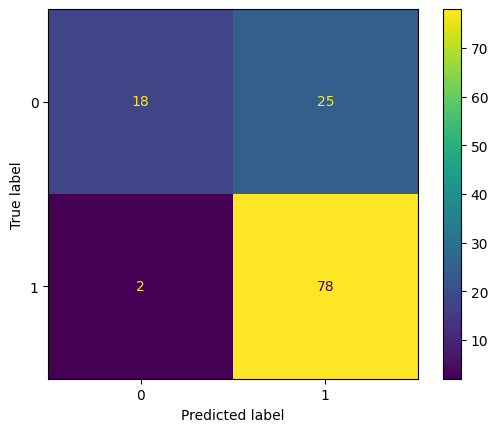

In [70]:
from sklearn.metrics import ConfusionMatrixDisplay
disp=ConfusionMatrixDisplay(confusion_matrix(y_test,y_pred))
disp.plot()
plt.show

## TESTING DATA

In [71]:
test_data=pd.read_csv('test.csv')

In [72]:
test_data.loc[test_data['Dependents'] == '3+', 'Dependents'] = 3


In [73]:
test_data.shape

(367, 12)

In [74]:
test_data.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,367.000000,367.000000,362.000000,361.000000,338.000000
mean,4805.599455,1569.577657,136.132597,342.537396,0.825444
std,4910.685399,2334.232099,61.366652,65.156643,0.380150
min,0.000000,0.000000,28.000000,6.000000,0.000000
25%,2864.000000,0.000000,100.250000,360.000000,1.000000
50%,3786.000000,1025.000000,125.000000,360.000000,1.000000
75%,5060.000000,2430.500000,158.000000,360.000000,1.000000
max,72529.000000,24000.000000,550.000000,480.000000,1.000000


In [75]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            367 non-null    object 
 1   Gender             356 non-null    object 
 2   Married            367 non-null    object 
 3   Dependents         357 non-null    object 
 4   Education          367 non-null    object 
 5   Self_Employed      344 non-null    object 
 6   ApplicantIncome    367 non-null    int64  
 7   CoapplicantIncome  367 non-null    int64  
 8   LoanAmount         362 non-null    float64
 9   Loan_Amount_Term   361 non-null    float64
 10  Credit_History     338 non-null    float64
 11  Property_Area      367 non-null    object 
dtypes: float64(3), int64(2), object(7)
memory usage: 34.5+ KB


In [76]:
test_data.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome      int64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
dtype: object

In [77]:
## plotting of Test data

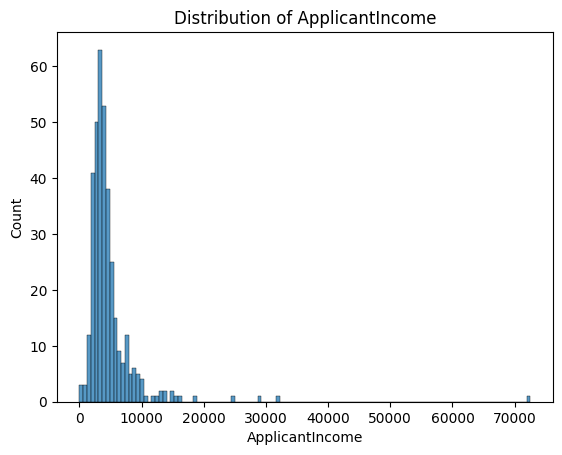

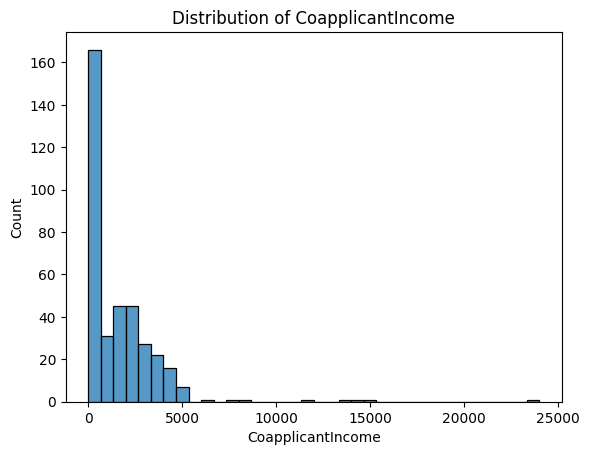

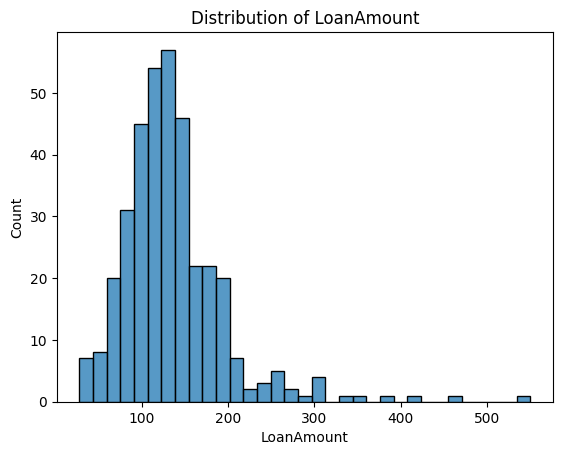

In [78]:
num_features = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount']
for feature in num_features:
    plt.figure()
    sns.histplot(test_data[feature])
    plt.title(f'Distribution of {feature}')
    plt.show()

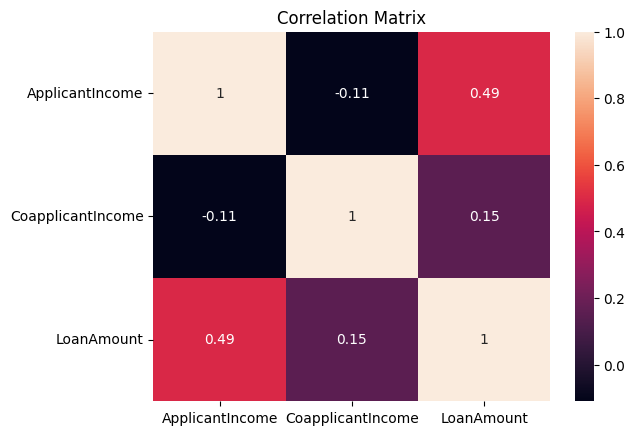

In [79]:
plt.figure()
sns.heatmap(test_data[num_features].corr(), annot=True)
plt.title('Correlation Matrix')
plt.show()


In [80]:
## pre Processing of testing data

In [81]:
test_data.isna().sum()

Loan_ID               0
Gender               11
Married               0
Dependents           10
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
dtype: int64

In [82]:
obj_col=['Gender','Dependents','Self_Employed']
for j in obj_col:
    test_data[j]=test_data[j].fillna(test_data[j].mode()[0])

In [83]:
float_col=['LoanAmount','Loan_Amount_Term','Credit_History']
for i in float_col:
    test_data[i]=test_data[i].fillna(test_data[i].median())

In [84]:
test_data.isna().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
dtype: int64

In [85]:
test_data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,1.0,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


In [86]:
from sklearn.preprocessing import LabelEncoder
lab_enc=LabelEncoder()

In [87]:
lst=['Loan_ID','Gender','Married','Education','Self_Employed','Property_Area']
for i in lst:
    test_data[i]=lab_enc.fit_transform(test_data[i])

In [88]:
test_data.dtypes

Loan_ID                int64
Gender                 int64
Married                int64
Dependents            object
Education              int64
Self_Employed          int64
ApplicantIncome        int64
CoapplicantIncome      int64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area          int64
dtype: object

In [89]:
test_data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,0,1,1,0,0,0,5720,0,110.0,360.0,1.0,2
1,1,1,1,1,0,0,3076,1500,126.0,360.0,1.0,2
2,2,1,1,2,0,0,5000,1800,208.0,360.0,1.0,2
3,3,1,1,2,0,0,2340,2546,100.0,360.0,1.0,2
4,4,1,0,0,1,0,3276,0,78.0,360.0,1.0,2


In [90]:
test_data.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area'],
      dtype='object')

STANDARD SCALING

In [91]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

In [92]:
test_data= scaler.fit_transform(test_data)

In [93]:
test_data

array([[-1.72733774,  0.48547939,  0.75835829, ...,  0.26602207,
         0.4376739 ,  1.11876379],
       [-1.71789873,  0.48547939,  0.75835829, ...,  0.26602207,
         0.4376739 ,  1.11876379],
       [-1.70845973,  0.48547939,  0.75835829, ...,  0.26602207,
         0.4376739 ,  1.11876379],
       ...,
       [ 1.70845973,  0.48547939, -1.31863792, ...,  0.26602207,
         0.4376739 , -0.09598861],
       [ 1.71789873,  0.48547939,  0.75835829, ...,  0.26602207,
         0.4376739 , -1.31074101],
       [ 1.72733774,  0.48547939, -1.31863792, ..., -2.52163936,
         0.4376739 , -1.31074101]])

In [94]:
test_data.shape

(367, 12)

In [95]:
test_data=pd.DataFrame(test_data,columns=['Loan_ID','Gender','Married','Dependents','Education','Self_Employed','ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term', 'Credit_History', 'Property_Area'])

## MODELLING

In [96]:
test_data=test_data.drop('Loan_ID',axis=1)

In [97]:
predictions=logit_model.predict(test_data)

In [98]:
predictions

array([1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0,
       1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1,

In [99]:
test_data.shape

(367, 11)

In [100]:
predictions.shape

(367,)

In [101]:
test_data=pd.read_csv("test.csv")
submission = pd.DataFrame({'Loan_ID': test_data['Loan_ID'], 'Loan_Status': predictions})
submission['Loan_Status'].replace(0, 'N',inplace=True)
submission['Loan_Status'].replace(1, 'Y',inplace=True)
submission.to_csv(r"C:\Users\USER\Desktop\submission\submission.csv",index=False)

In [102]:
print(submission)

      Loan_ID Loan_Status
0    LP001015           Y
1    LP001022           Y
2    LP001031           Y
3    LP001035           Y
4    LP001051           N
..        ...         ...
362  LP002971           Y
363  LP002975           Y
364  LP002980           Y
365  LP002986           Y
366  LP002989           Y

[367 rows x 2 columns]
